This notebook walks through how to access hyperspectral Rrs data from NASA's PACE satellite, convert that Rrs data into 
pigment concentrations (chlorophyll a, chlorophyll b, chlorophyll c, and photoprotective carotenoids (PPC)), and then plot
the pigment concentratiosn using a color map with latitude and longitude coordinates. 

Using the environment.yml file in the git repository, create a new conda environment using the terminal:

In the upper right corner of the jupyter lab page select the pace kernel from the dropdown box.

You need an Earthdata account to access PACE data. You can create an account here: https://urs.earthdata.nasa.gov
See part one (Setup) and two (NASA Earthdata Authentication) on this tutorial: https://oceancolor.gsfc.nasa.gov/resources/docs/tutorials/notebooks/oci_data_access/

In [1]:
import earthaccess

In [2]:
auth = earthaccess.login(persist=True)

Next, import utils.

In [3]:
import utils

In [5]:
# download Rrs, salinity, and temp data from 2024-06-12 to 2024-06-15 at 4km resolution
rrs_paths, sal_paths, temp_paths = utils.load_data(('2024-06-12','2024-06-15'), '4km')

Granules found: 4
Granules found: 11
Granules found: 4
 Getting 4 granules, approx download size: 2.66 GB


QUEUEING TASKS | :   0%|          | 0/4 [00:00<?, ?it/s]

File PACE_OCI.20240612.L3m.DAY.RRS.V2_0.Rrs.4km.NRT.nc already downloaded
File PACE_OCI.20240613.L3m.DAY.RRS.V2_0.Rrs.4km.NRT.nc already downloaded
File PACE_OCI.20240614.L3m.DAY.RRS.V2_0.Rrs.4km.NRT.nc already downloaded
File PACE_OCI.20240615.L3m.DAY.RRS.V2_0.Rrs.4km.NRT.nc already downloaded


PROCESSING TASKS | :   0%|          | 0/4 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/4 [00:00<?, ?it/s]

 Getting 11 granules, approx download size: 0.11 GB


QUEUEING TASKS | :   0%|          | 0/11 [00:00<?, ?it/s]

File SMAP_L3_SSS_20240608_8DAYS_V5.0.nc already downloadedFile SMAP_L3_SSS_20240609_8DAYS_V5.0.nc already downloaded

File SMAP_L3_SSS_20240611_8DAYS_V5.0.nc already downloaded
File SMAP_L3_SSS_20240612_8DAYS_V5.0.nc already downloaded
File SMAP_L3_SSS_20240613_8DAYS_V5.0.nc already downloaded
File SMAP_L3_SSS_20240610_8DAYS_V5.0.nc already downloaded
File SMAP_L3_SSS_20240615_8DAYS_V5.0.nc already downloaded
File SMAP_L3_SSS_20240616_8DAYS_V5.0.nc already downloaded
File SMAP_L3_SSS_20240617_8DAYS_V5.0.nc already downloaded
File SMAP_L3_SSS_20240618_8DAYS_V5.0.nc already downloaded
File SMAP_L3_SSS_20240614_8DAYS_V5.0.nc already downloaded


PROCESSING TASKS | :   0%|          | 0/11 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/11 [00:00<?, ?it/s]

 Getting 4 granules, approx download size: 2.77 GB


QUEUEING TASKS | :   0%|          | 0/4 [00:00<?, ?it/s]

File 20240612090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc already downloadedFile 20240613090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc already downloaded

File 20240614090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc already downloaded
File 20240615090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc already downloaded


PROCESSING TASKS | :   0%|          | 0/4 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/4 [00:00<?, ?it/s]

In [6]:
rrs_paths

['rrs_data/PACE_OCI.20240612.L3m.DAY.RRS.V2_0.Rrs.4km.NRT.nc',
 'rrs_data/PACE_OCI.20240613.L3m.DAY.RRS.V2_0.Rrs.4km.NRT.nc',
 'rrs_data/PACE_OCI.20240614.L3m.DAY.RRS.V2_0.Rrs.4km.NRT.nc',
 'rrs_data/PACE_OCI.20240615.L3m.DAY.RRS.V2_0.Rrs.4km.NRT.nc']

In [8]:
# salinity data files are kept as 8 day averages, so some files from before/after the date range are downloaded as well
sal_paths

['sal_data/SMAP_L3_SSS_20240608_8DAYS_V5.0.nc',
 'sal_data/SMAP_L3_SSS_20240609_8DAYS_V5.0.nc',
 'sal_data/SMAP_L3_SSS_20240610_8DAYS_V5.0.nc',
 'sal_data/SMAP_L3_SSS_20240611_8DAYS_V5.0.nc',
 'sal_data/SMAP_L3_SSS_20240612_8DAYS_V5.0.nc',
 'sal_data/SMAP_L3_SSS_20240613_8DAYS_V5.0.nc',
 'sal_data/SMAP_L3_SSS_20240614_8DAYS_V5.0.nc',
 'sal_data/SMAP_L3_SSS_20240615_8DAYS_V5.0.nc',
 'sal_data/SMAP_L3_SSS_20240616_8DAYS_V5.0.nc',
 'sal_data/SMAP_L3_SSS_20240617_8DAYS_V5.0.nc',
 'sal_data/SMAP_L3_SSS_20240618_8DAYS_V5.0.nc']

In [9]:
temp_paths

['temp_data/20240612090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc',
 'temp_data/20240613090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc',
 'temp_data/20240614090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc',
 'temp_data/20240615090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc']

After downloading the files you can create an xarray dataset by calling utils.create_dataset(). This method takes in either a single file path or a string of file paths along with coordinates to create a box of data. If a list of multiple file paths is used, the method returns the average Rrs, salinity, or temperature values at each coordinate averaged by date. The order of parameters passed in is the file path or list of Rrs file paths, list of salinity file paths, the list of temperature file paths, the northern boundary of the box, the southern boundary, the western boundary, and finally the eastern boundary. Latitude coordinates range from -90 to 90, longitude coordinates range from -180 to 180. 

In [10]:
# This creates an xarray dataset containing Rrs, salinity, and temperature values from 2024-06-12 within the coordinates 
# 48.7N, 47.8S, -125.9W, -124.2E, an area off the coast of Washington. 
dataset = utils.create_dataset(rrs_paths[0], sal_paths[0], temp_paths[0], 48.7, 47.8, -125.9, -124.2)
dataset

<xarray.Dataset> Size: 676kB
Dimensions:     (lat: 22, lon: 41, wavelength: 184)
Coordinates:
  * lat         (lat) float32 88B 48.69 48.65 48.6 48.56 ... 47.9 47.85 47.81
  * lon         (lon) float32 164B -125.9 -125.9 -125.8 ... -124.3 -124.3 -124.2
  * wavelength  (wavelength) float64 1kB 339.0 341.0 344.0 ... 714.0 717.0 719.0
Data variables:
    rrs         (lat, lon, wavelength) float32 664kB -0.00445 -0.004588 ... nan
    sal         (lat, lon) float32 4kB nan nan nan nan nan ... nan nan nan nan
    temp        (lat, lon) float64 7kB 285.2 285.1 285.0 284.8 ... nan nan nan

In [11]:
# This creates an xarray dataset containing the average Rrs, salinity, and temperature values from 2024-06-10 to 2024-06-15 
avg_dataset = utils.create_dataset(rrs_paths, sal_paths, temp_paths, 48.7, 47.8, -125.9, -124.2)
avg_dataset

<xarray.Dataset> Size: 676kB
Dimensions:     (lat: 22, lon: 41, wavelength: 184)
Coordinates:
  * lat         (lat) float32 88B 48.69 48.65 48.6 48.56 ... 47.9 47.85 47.81
  * lon         (lon) float32 164B -125.9 -125.9 -125.8 ... -124.3 -124.3 -124.2
  * wavelength  (wavelength) float64 1kB 339.0 341.0 344.0 ... 714.0 717.0 719.0
Data variables:
    rrs         (lat, lon, wavelength) float32 664kB -0.002548 -0.003339 ... nan
    sal         (lat, lon) float32 4kB nan nan nan nan nan ... nan nan nan nan
    temp        (lat, lon) float64 7kB 285.1 285.0 284.9 284.8 ... nan nan nan

Now that we have hyperspectral Rrs, salinity, and temperature values all in one dataset we can call utils.calculate_pigments to calculate the pigment concentrations for each coordinate within the dataset's coordinate range. This method will return an xarray dataset with pigment values for chla, chlb, chlc, and ppc. This calculates the pigment values for each coordinate in the dataset. Calculating the pigments can take a long time; the number of pixels calculated and the total number of pixels is displayed.

In [12]:
# This calculates pigments using the average Rrs, salinity, and temperature from 2024-06-12 to 2024-06-15
pigments = utils.calculate_pigments(avg_dataset)
pigments

num pixels:  902
Progress: 902/902


<xarray.Dataset> Size: 29kB
Dimensions:  (lat: 22, lon: 41)
Coordinates:
  * lat      (lat) float32 88B 48.69 48.65 48.6 48.56 ... 47.94 47.9 47.85 47.81
  * lon      (lon) float32 164B -125.9 -125.9 -125.8 ... -124.3 -124.3 -124.2
Data variables:
    chla     (lat, lon) float64 7kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    chlb     (lat, lon) float64 7kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    chlc     (lat, lon) float64 7kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    ppc      (lat, lon) float64 7kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

After the pigments have downloaded, it is a good idea to save the pigment dataset to an nc file so you don't have to compute the pigment values again. 

In [13]:
import xarray
pigments.to_netcdf('pig_vals/washington_coast')

You can open the data file again when you need it

In [14]:
pigments = xarray.open_dataset('pig_vals/washington_coast')
pigments

<xarray.Dataset> Size: 29kB
Dimensions:  (lat: 22, lon: 41)
Coordinates:
  * lat      (lat) float32 88B 48.69 48.65 48.6 48.56 ... 47.94 47.9 47.85 47.81
  * lon      (lon) float32 164B -125.9 -125.9 -125.8 ... -124.3 -124.3 -124.2
Data variables:
    chla     (lat, lon) float64 7kB ...
    chlb     (lat, lon) float64 7kB ...
    chlc     (lat, lon) float64 7kB ...
    ppc      (lat, lon) float64 7kB ...

Now use utils' plot_pigments method to plot a map of pigment values. Pigment values are in units of mg/m^3. 

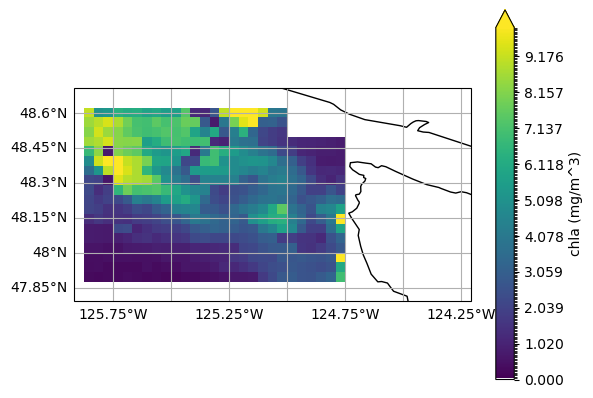

In [15]:
# This plots the concentration of chlorophyll a on a color map. The color bar is set to show values from 0 to 10 with a label
# 'chla (mg/m^3)'
chla = pigments['chla']
utils.plot_pigments(pigments['chla'], 0, 10, 'chla (mg/m^3)')

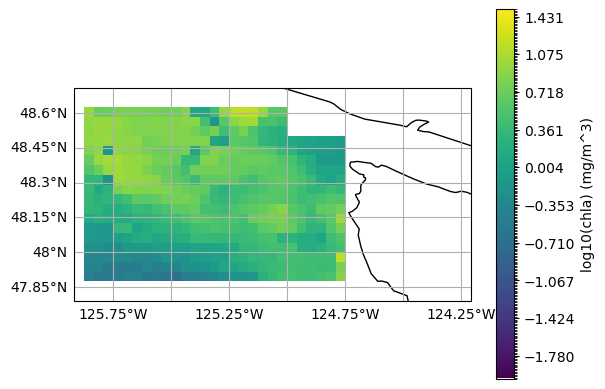

In [16]:
# plot chlorophyll a on a log 10 scale. Note how the scale of the color bar is now -2 to 1.5
import numpy as np
log_chla = np.log10(chla)
utils.plot_pigments(log_chla, -2, 1.5, 'log10(chla) (mg/m^3)')

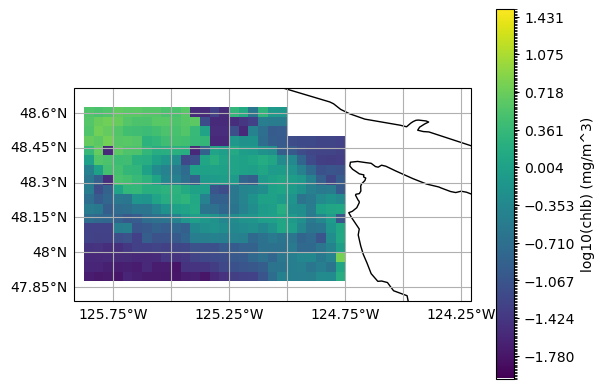

In [17]:
# plot chlorophyll b on a log 10 scale
chlb = pigments['chlb']
log_chlb = np.log10(chlb)
utils.plot_pigments(log_chlb, -2, 1.5, 'log10(chlb) (mg/m^3)')

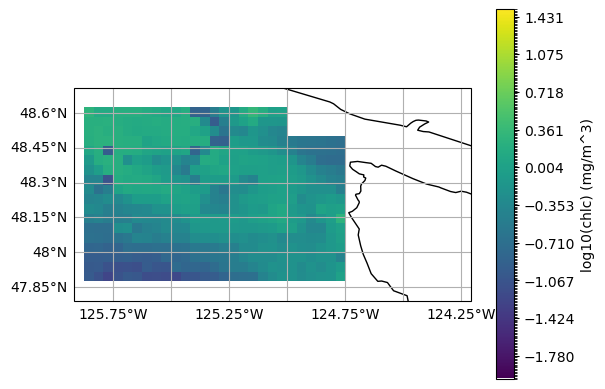

In [18]:
# plot chlorophyll c on a log 10 scale
chlc = pigments['chlc']
log_chlc = np.log10(chlc)
utils.plot_pigments(log_chlc, -2, 1.5, 'log10(chlc) (mg/m^3)')

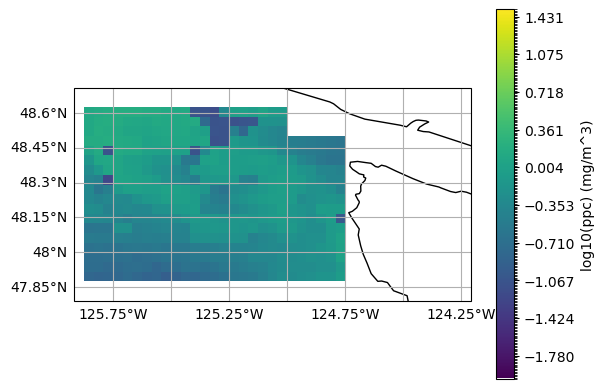

In [19]:
# plot PPC on a log 10 scale
ppc = pigments['ppc']
log_ppc = np.log10(ppc)
utils.plot_pigments(log_ppc, -2, 1.5, 'log10(ppc) (mg/m^3)')

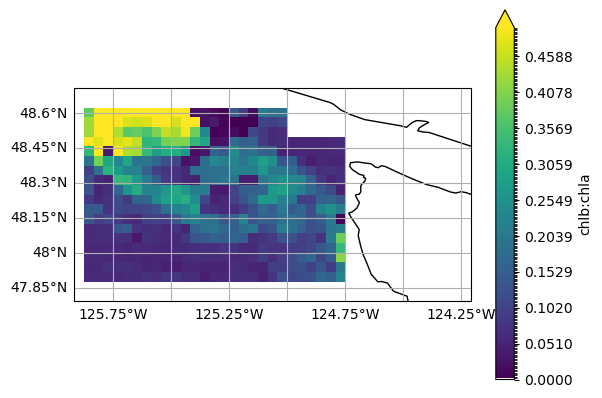

In [21]:
# plot the ratio between chlb and chla
ba_ratio = chlb/chla
utils.plot_pigments(ba_ratio, 0, 0.5, 'chlb:chla')

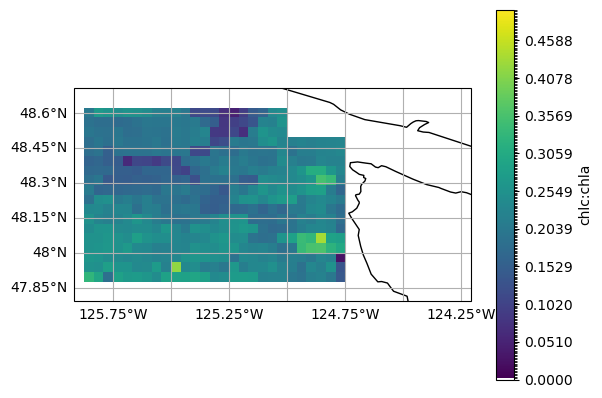

In [24]:
# plot the ratio between chlc and chla
ca_ratio = chlc/chla
utils.plot_pigments(ca_ratio, 0, 0.5, 'chlc:chla')

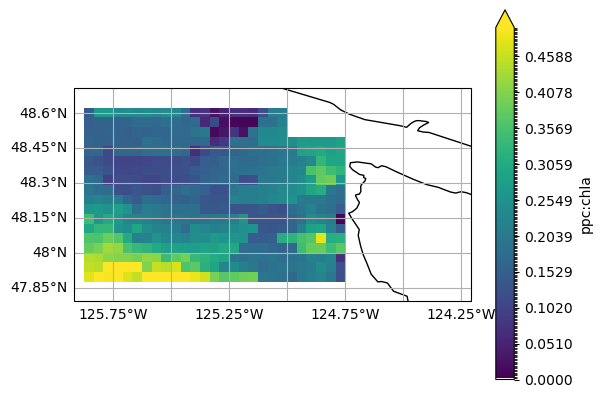

In [25]:
# plot the ratio between ppc and chla
pa_ratio = ppc/chla
utils.plot_pigments(pa_ratio, 0, 0.5, 'ppc:chla')